<a href="https://colab.research.google.com/github/subrataBAEC/Deep-Learning-Basics/blob/main/Deep-Learning-Basics/customer_churn/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churin prediction using ANN

### 1. Data Loading and Preparation
### 2. Prediction using ANN
##### **Prepared By**: Subrata Saha
##### **Email**: subratabaec@gmail.com
##### **Time**: Feb, 2023

In [ ]:
# !pip install tensorflow-gpu
!pip install tensorflow 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# !pip list


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# for google colab
from google.colab import drive 
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# load data
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Deep_learning/practice/customer_churn/Churn_Modelling.csv")
# initially taking 500 rows
#df=df[:10] 
display(df.head(5))
# df.head()
print("shape: ",df.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


shape:  (10000, 14)


#### Note: 
col 0,1,2 are not necessary, so discarded. name has no influnce on decision. columns 3 to 13 are independent and column 13 is the dependent variable.

In [ ]:
# df.info()

In [ ]:
# variable separation
x = df.iloc[:, 3:13]
y = df.iloc[:, 13]
# print(X.head())
# print(y.head())

In [ ]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
# Unique Values
# print(x['Gender'].unique())
# print(x['Geography'].unique())

# feature engineering
# One hot Encoding
Geography2=pd.get_dummies(x["Geography"],drop_first=True)
Gender2= pd.get_dummies(x["Gender"],drop_first=True)
# Gender
# x.head()

#### Note: 
Now, Drop "Gender" and "Geography" from "x" dataframe and add/concatenate encoded "Gender" and "Geography" to the "x" dataframe.

In [ ]:
# drop "Gender" and "Geography
x=x.drop(["Geography","Gender"],axis=1)

In [ ]:
# x.head()
# x.shape
# concatenate
x=pd.concat([x,Geography2,Gender2], axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
# feature scaling
# display(x.describe())

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
# display(x.describe())
# x

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
print(X_test.shape)
# y.head()

(2000, 11)


### Implement ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU # activation function
from tensorflow.keras.layers import Dropout # to reduce overfitting

In [ ]:
# Initialising the ANN
classifier = Sequential()

In [ ]:
# Adding the input layer
classifier.add(Dense(units=11,activation='relu')) # input variable= 11

In [ ]:
# Adding the first hidden layer
classifier.add(Dense(units=6,activation='relu')) # 6, or 7 not fixed

In [ ]:
# Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [ ]:
# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# change learning rate
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
# classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) #The default learning rate is 0.001

classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy']) 


In [ ]:
# early stopping
import tensorflow as tf
early_stopping= tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size=10, epochs=30) # without early stopping
# model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size=10, epochs=30, callbacks=early_stopping)

Epoch 1/30
536/536 [==============================] - 2s 5ms/step - loss: 0.3230 - accuracy: 0.8699 - val_loss: 0.3654 - val_accuracy: 0.8470
Epoch 2/30
536/536 [==============================] - 2s 4ms/step - loss: 0.3229 - accuracy: 0.8694 - val_loss: 0.3624 - val_accuracy: 0.8504
Epoch 3/30
536/536 [==============================] - 2s 5ms/step - loss: 0.3240 - accuracy: 0.8677 - val_loss: 0.3589 - val_accuracy: 0.8516
Epoch 4/30
536/536 [==============================] - 3s 6ms/step - loss: 0.3250 - accuracy: 0.8692 - val_loss: 0.3634 - val_accuracy: 0.8504
Epoch 5/30
536/536 [==============================] - 3s 5ms/step - loss: 0.3244 - accuracy: 0.8686 - val_loss: 0.3612 - val_accuracy: 0.8550
Epoch 6/30
536/536 [==============================] - 2s 5ms/step - loss: 0.3191 - accuracy: 0.8703 - val_loss: 0.3689 - val_accuracy: 0.8466
Epoch 7/30
536/536 [==============================] - 3s 5ms/step - loss: 0.3253 - accuracy: 0.8683 - val_loss: 0.3604 - val_accuracy: 0.8504
Epoch 

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

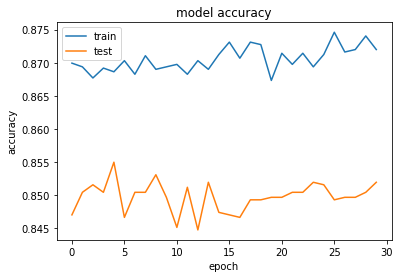

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

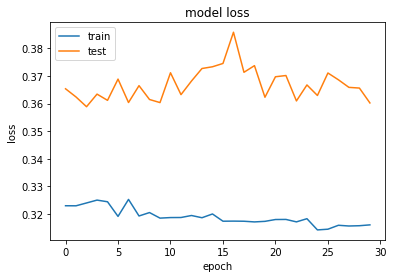

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Prediction

In [ ]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1554,   53],
       [ 235,  158]])

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.856

**Acknowledgement:** 
- Motivated from Krish Naik. 
- https://www.youtube.com/watch?v=ydzFSLDmHmE&list=PLZoTAELRMXVPiyueAqA_eQnsycC_DSBns&index=5&ab_channel=KrishNaik